##### Linear Regression - Diabetes Dataset

Diabetes dataset is one of the datasets available in sklearn. The diabetes dataset consists of 10 physiological variables (age, sex, weight, blood pressure) measure on 442 patients, and an indication of disease progression after one year.
You are given a Training dataset csv file with X train and Y train data. As studied in lecture, your task is to come up with Linear Regression training algorithm and thus predictions for the test dataset given.
Read Instructions carefully -
1. Use Linear Regression(in scikit learn) as a training algorithm and submit results predicted by that.
2. Files are in csv format, use genfromtxt function in numpy to load data from csv file. Similarly you can use savetxt function to save data into a file.
3. Submit a csv file with only predictions for X test data. File should not have any headers and should only have one column i.e. predictions.  Also prediction values in file should be upto **5** decimal places.
4. Upon submission of predictions, the score you will get is based on coefficient of determination.


Load Data

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Load trainig data
data_training = np.loadtxt('DataSets\\training_diabetes_x_y_train.csv', delimiter=',')
print('data_training.shape', data_training.shape)

# Load test data
x_data_test = np.loadtxt('DataSets\\test_diabetes_x_test.csv', delimiter=',')
print('data_test.shape', x_data_test.shape)

data_training.shape (331, 11)
data_test.shape (111, 10)


Split training data

In [4]:
X = data_training[:, 0:10]
y = data_training[:, 10]

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.4, random_state = 2)

print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('Y_train', Y_train.shape)
print('Y_test', Y_test.shape)

X_train (198, 10)
X_test (133, 10)
Y_train (198,)
Y_test (133,)


Fit the model

In [5]:
alg1 = LinearRegression()
alg1.fit(X_train, Y_train)

m = np.round(alg1.coef_, 2)
c = np.round(alg1.intercept_, 2)
coef = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
for i, j in zip(coef, m):
    print(i, '\t\t', j)
print('Intercept = ', c)


age 		 69.26
sex 		 -255.83
bmi 		 670.18
bp 		 298.36
s1 		 -1429.11
s2 		 1035.51
s3 		 511.58
s4 		 326.47
s5 		 824.57
s6 		 49.31
Intercept =  157.07


Predict and plot the outcome

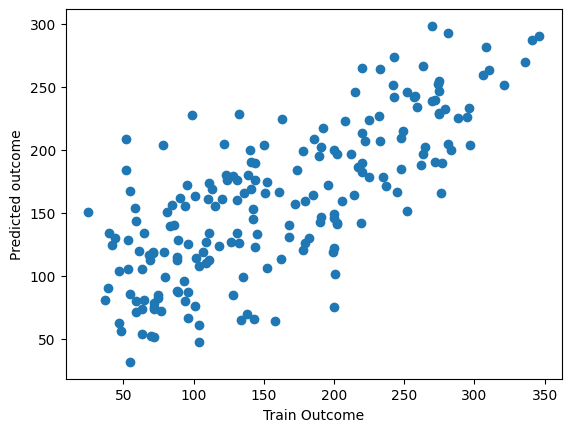

In [6]:
y_pred_train = alg1.predict(X_train)

plt.scatter(Y_train, y_pred_train)
plt.xlabel('Train Outcome')
plt.ylabel('Predicted outcome')
plt.show()

Get the score

In [7]:
score_training = r2_score(Y_train, y_pred_train)
print('The model explains', np.round(score_training*100, 5), '% variance of the target')

The model explains 56.53807 % variance of the target


Predict outcome with test data and create a CSV file

In [8]:
y_pred_test = alg1.predict(x_data_test)
np.savetxt('DataSets\\Predictions.csv', y_pred_test, delimiter=',', fmt='%.5f')